# Moore's Law

## Introduction

In 1965, engineer Gordon Moore predicted that transistors on a chip would double every two years in the coming decade. This notebook will compare Moore’s prediction against actual transistor counts in the 53 years following his prediction. It will also demonstrate the determination the best-fit constants to describe the exponential growth of transistors on semiconductors compared to Moore’s Law.

## Objectives

* Load data from a *.csv file
* Perform linear regression and predict exponential growth using ordinary least squares
* Compare exponential growth constants between models
* Share result of analysis in a file:
    * as NumPy zipped files *.npz
    * as a *.csv file
* Assess the amazing progress semiconductor manufacturers have made in the last five decades

## Requirements

1. Packages need to be installed for running this notebook are:
    * NumPy
    * Matplotlib
    * statsmodels (for ordinary linear regression)

2. Since this is an exponential growth law, a little background in doing math with  `natural logs` and `exponentials` will be required. The following NumPy, Matplotlib, and statsmodels functions will be used:

    * `np.loadtxt`: this function loads text into a NumPy array
    * `np.log`: this function takes the natural log of all elements in a NumPy array
    * `np.exp`: this function takes the exponential of all elements in a NumPy array
    * `lambda`: this is a minimal function definition for creating a function model
    * `plt.semilogy`: this function will plot x-y data onto a figure with a linear x-axis and <math xmlns='http://www.w3.org/1998/Math/MathML'><msub><mi>log</mi><mrow data-mjx-texclass='ORD"><mn>10</mn></mrow></msub></math> y-axis
    * `plt.plot`: this function will plot x-y data on linear axes
    * `sm.OLS`: find fitting parameters and standard errors using the statsmodels ordinary least squares model
    * <b>slicing arrays</b>: view parts of the data loaded into the workspace, slice the arrays e.g. x[:10] for the first 10 values in the array, x
    * <b>boolean array indexing</b>: to view parts of the data that match a given condition use boolean operations to index an array
    * `np.block`: to combine arrays into 2D arrays
    * `np.newaxis`: to change a 1D vector to a row or column vector
    * `np.savez` and `np.savetxt`: these two functions will save your arrays in zipped array format and text, respectively

## Explanation

The empirical model of Moore's law assumes that the number of transistors per semiconductor follows an exponential growth.

<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>log`</mi><mo data-mjx-texclass="NONE">&#x2061;</mo><mo stretchy="false">(</mo><mtext>transistor_count</mtext><mo stretchy="false">)</mo><mo>=</mo><mi>f</mi><mo stretchy="false">(</mo><mtext>year</mtext><mo stretchy="false">)</mo><mo>=</mo><mi>A</mi><mo>&#x22C5;</mo><mtext>year</mtext><mo>+</mo><mi>B</mi></math>

where A and B are fitting constants. Semiconductor manufacturers’ data will be used to find the fitting constants.

These constants for Moore’s law need to be determined by specifying the rate for added transistors, 2, and giving an initial number of transistors for a given year. Moore’s law is stated in an exponential form as follows:

<math xmlns="http://www.w3.org/1998/Math/MathML"><mtext>transistor_count</mtext><mo>=</mo><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><msub><mi>A</mi><mi>M</mi></msub><mo>&#x22C5;</mo><mtext>year</mtext><mo>+</mo><msub><mi>B</mi><mi>M</mi></msub></mrow></msup></math>

Where <math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>A</mi><mi>M</mi></msub></math> and <math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>B</mi><mi>M</mi></msub></math> are constants that double the number of transistors every two years and start at 2250 transistors in 1971,

1. <math xmlns="http://www.w3.org/1998/Math/MathML"><mstyle displaystyle="true" scriptlevel="0"><mfrac><mrow><mtext>transistor_count</mtext><mo stretchy="false">(</mo><mtext>year</mtext><mo>+</mo><mn>2</mn><mo stretchy="false">)</mo></mrow><mrow><mtext>transistor_count</mtext><mo stretchy="false">(</mo><mtext>year</mtext><mo stretchy="false">)</mo></mrow></mfrac></mstyle><mo>=</mo><mn>2</mn><mo>=</mo><mstyle displaystyle="true" scriptlevel="0"><mfrac><mrow><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><msub><mi>B</mi><mi>M</mi></msub></mrow></msup><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><msub><mi>A</mi><mi>M</mi></msub><mtext>year</mtext><mo>+</mo><mn>2</mn><msub><mi>A</mi><mi>M</mi></msub></mrow></msup></mrow><mrow><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><msub><mi>B</mi><mi>M</mi></msub></mrow></msup><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><msub><mi>A</mi><mi>M</mi></msub><mtext>year</mtext></mrow></msup></mrow></mfrac></mstyle><mo>=</mo><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><mn>2</mn><msub><mi>A</mi><mi>M</mi></msub></mrow></msup><mo stretchy="false">&#x2192;</mo><msub><mi>A</mi><mi>M</mi></msub><mo>=</mo><mfrac><mrow><mi>log</mi><mo data-mjx-texclass="NONE">&#x2061;</mo><mo stretchy="false">(</mo><mn>2</mn><mo stretchy="false">)</mo></mrow><mn>2</mn></mfrac></math>

2. $\log(2250) = \frac{\log(2)}{2}\cdot 1971 + B_M \rightarrow B_M = \log(2250)-\frac{\log(2)}{2}\cdot 1971$

so Moore’s law stated as an exponential function is

<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>log</mi><mo data-mjx-texclass="NONE">&#x2061;</mo><mo stretchy="false">(</mo><mtext>transistor_count</mtext><mo stretchy="false">)</mo><mo>=</mo><msub><mi>A</mi><mi>M</mi></msub><mo>&#x22C5;</mo><mtext>year</mtext><mo>+</mo><msub><mi>B</mi><mi>M</mi></msub></math>

where

$A_M=0.3466$

$B_M=-675.4$

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
A_M = np.log(2) / 2
B_M = np.log(2250) - A_M * 1971
Moores_law = lambda year: np.exp(B_M) * np.exp(A_M * year)

In 1971, there were 2250 transistors on the Intel 4004 chip. Use Moores_law to check the number of semiconductors Gordon Moore would expect in 1973.

In [3]:
ML_1971 = Moores_law(1971)
ML_1973 = Moores_law(1973)
print(f'In 1973, G. Moore expects {ML_1973:.0f} transistors on Intels chips')
print(f'This is x{(ML_1973 / ML_1971):.2f} more transistors than 1971')

In 1973, G. Moore expects 4500 transistors on Intels chips
This is x2.00 more transistors than 1971


In [4]:
data = np.loadtxt('data/transistor_data.csv', delimiter=',', usecols=[1, 2], skiprows=1)

In [5]:
year = data[:, 1]
transistor_count = data[:, 0]

print('year:\t\t\t', year[:10])
print('transistor count:\t', transistor_count[:10])

year:			 [1971. 1972. 1973. 1974. 1974. 1974. 1974. 1975. 1975. 1975.]
transistor count:	 [2250. 3500. 2500. 3000. 4100. 6000. 8000. 4528. 4000. 5000.]


In [6]:
yi = np.log(transistor_count)

The model assumes that yi is a function of year. Now, find the best-fit model that minimizes the difference between $y_i$ and $A\cdot \text{year} +B$, as such

$\min \sum|y_i - (A\cdot \text{year}_i + B)|^2$

This sum of squares error can be succinctly represented as arrays as such

$\sum|\mathbf{y}-\mathbf{Z} [A,~B]^T|^2$

where `y` are the observations of the log of the number of transistors in a 1D array and $\mathbf{Z}=[\text{year}_i^1,~\text{year}_i^0]$ are the polynomial terms for $\text{year}_i$ in the first and second columns. By creating this set of regressors in the `Z-matrix` you set up an ordinary least squares statistical model. Some clever NumPy array features will build `Z`

1. `year[:,np.newaxis]`: takes the 1D array with shape (179,) and turns it into a 2D column vector with shape (179,1)

2. `**[1, 0]`: stacks two columns, in the first column is `year**1` and the second column is `year**0 == 1`

In [7]:
Z = year[:, np.newaxis] ** [1, 0]

Now that a matrix of regressors, $Z$, and the observations are in vector, $y_i$, are prepared, these variables can be used to build the an ordinary least squares model with `sm.OLS`.

In [8]:
model = sm.OLS(yi, Z)

Now, the fitting constants, $A$ and $B$, and their standard errors can be viewed by running the fit and printing the summary to view results as such,

In [9]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     3309.
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          1.75e-116
Time:                        17:39:11   Log-Likelihood:                -273.43
No. Observations:                 179   AIC:                             550.9
Df Residuals:                     177   BIC:                             557.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3416      0.006     57.521      0.0

The __OLS Regression Results__ summary gives a lot of information about the regressors, $\mathbf{Z},$ and observations, $\mathbf{y}.$ The most important outputs for your current analysis are

```
=================================
                 coef    std err
---------------------------------
x1             0.3416      0.006
const       -666.3264     11.890
=================================
```

where `x1` is slope, $A=0.3416$, `const` is the intercept, $B=-666.364$, and `std error` gives the precision of constants $A=0.342\pm 0.006~\dfrac{\log(\text{transistors}/\text{chip})}{\text{years}}$ and $B=-666\pm 12~\log(\text{transistors}/\text{chip}),$ where the units are in $\log(\text{transistors}/\text{chip})$. An exponential growth model is trained. To get the constants, save them to an array `AB` with `results.params` and assign $A$ and $B$ to `x1` and `constant`.

In [10]:
AB = results.params
A = AB[0]
B = AB[1]

Did manufacturers double the transistor count every two years? You have
the final formula,

<math xmlns="http://www.w3.org/1998/Math/MathML"><mstyle displaystyle="true" scriptlevel="0"><mfrac><mrow><mtext>transistor_count</mtext><mo stretchy="false">(</mo><mtext>year</mtext><mo>+</mo><mn>2</mn><mo stretchy="false">)</mo></mrow><mrow><mtext>transistor_count</mtext><mo stretchy="false">(</mo><mtext>year</mtext><mo stretchy="false">)</mo></mrow></mfrac></mstyle><mo>=</mo><mi>x</mi><mi>F</mi><mi>a</mi><mi>c</mi><mi>t</mi><mi>o</mi><mi>r</mi><mo>=</mo><mstyle displaystyle="true" scriptlevel="0"><mfrac><mrow><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><mi>B</mi></mrow></msup><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><mi>A</mi><mo stretchy="false">(</mo><mtext>year</mtext><mo>+</mo><mn>2</mn><mo stretchy="false">)</mo></mrow></msup></mrow><mrow><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><mi>B</mi></mrow></msup><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><mi>A</mi><mtext>year</mtext></mrow></msup></mrow></mfrac></mstyle><mo>=</mo><msup><mi>e</mi><mrow data-mjx-texclass="ORD"><mn>2</mn><mi>A</mi></mrow></msup></math>

where increase in number of transistors is $xFactor,$ number of years is 2, and $A$ is the best fit slope on the semilog function. The error in your prediction, $\Delta(xFactor),$ comes from the precision of your constant $A$, which you calculated as the standard error $\Delta A= 0.006$.

$\Delta (xFactor) = \frac{\partial}{\partial A}(e^{2A})\Delta A = 2Ae^{2A}\Delta A$

In [11]:
print('Rate of semiconductors added on a chip every 2 years:')
print('\tx{:.2f} +/- {:.2f} semiconductors per chip'.format(np.exp((A) * 2), 2 * A * np.exp(2 * A) * 0.006))

Rate of semiconductors added on a chip every 2 years:
	x1.98 +/- 0.01 semiconductors per chip


Based upon the least-squares regression model, the number of semiconductors per chip increased by a factor of $1.98\pm 0.01$ every two years. This model predicts the number of semiconductors each year. Now compare the model to the actual manufacturing reports. Plot the linear regression results and all of the transistor counts.

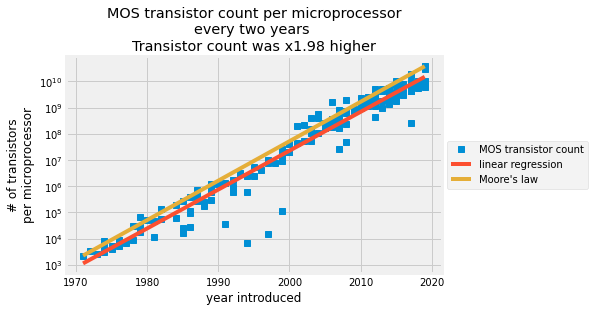

In [12]:
transistor_count_predicted = np.exp(B) * np.exp(A * year)
transistor_moores_law = Moores_law(year)

plt.style.use('fivethirtyeight')
plt.semilogy(year, transistor_count, 's', label='MOS transistor count')
plt.semilogy(year, transistor_count_predicted, label='linear regression')

plt.plot(year, transistor_moores_law, label="Moore's law")
plt.title(
    'MOS transistor count per microprocessor\n'
    + 'every two years \n'
    + 'Transistor count was x{:.2f} higher'.format(np.exp(A * 2))
)
plt.xlabel('year introduced')
plt.ylabel('# of transistors\nper microprocessor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [13]:
transistor_count2018 = transistor_count[year == 2018]
print(transistor_count2018.max(), transistor_count2018.min(), transistor_count2018.mean())

10000000000.0 5500000000.0 7940857142.857142


In [14]:
y = np.linspace(2017.5, 2018.5)
model_2018 = np.exp(B) * np.exp(A * y)
moore_model_2018 = Moores_law(y)

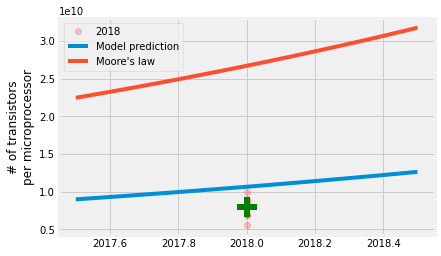

In [15]:
plt.plot(
    2018 * np.ones(np.sum(year == 2018)),
    transistor_count2018,
    'ro',
    label='2018',
    alpha=0.2
)

plt.plot(2018, transistor_count2018.mean(), 'g+', markersize=20, mew=6)

plt.plot(y, model_2018, label='Model prediction')
plt.plot(y, moore_model_2018, label="Moore's law")
plt.ylabel('# of transistors\nper microprocessor')
plt.legend()

In [16]:
notes = 'the arrays in this file are the result of a linear regression model\n'
notes += 'the arrays include\nyear: year of manufacture\n'
notes += 'transistor_count: number of transistors reported by manufacturers in a given year\n'
notes += 'transistor_count_predicted: linear regression model = exp({:.2f})*exp({:.2f}*year)\n'.format(
    B, A
)
notes += 'transistor_Moores_law: Moores law =exp({:.2f})*exp({:.2f}*year)\n'.format(
    B_M, A_M
)
notes += 'regression_csts: linear regression constants A and B for log(transistor_count)=A*year+B'
print(notes)

the arrays in this file are the result of a linear regression model
the arrays include
year: year of manufacture
transistor_count: number of transistors reported by manufacturers in a given year
transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
regression_csts: linear regression constants A and B for log(transistor_count)=A*year+B


In [17]:
np.savez(
    'data/mooreslaw_regression.npz',
    notes=notes,
    year=year,
    transistor_count=transistor_count,
    transistor_count_predicted=transistor_count_predicted,
    transistor_moores_law=transistor_moores_law,
    regression_csts=AB,
)

In [18]:
results = np.load('data/mooreslaw_regression.npz')
print(results['regression_csts'][1])

-666.3264063536255


In [19]:
head = 'the columns in this file are the result of a linear regression model\n'
head += 'the columns include\nyear: year of manufacture\n'
head += 'transistor_count: number of transistors reported by manufacturers in a given year\n'
head += 'transistor_count_predicted: linear regression model = exp({:.2f})*exp({:.2f}*year)\n'.format(
    B, A
)
head += 'transistor_Moores_law: Moores law =exp({:.2f})*exp({:.2f}*year)\n'.format(
    B_M, A_M
)
head += 'year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:'
print(head)

the columns in this file are the result of a linear regression model
the columns include
year: year of manufacture
transistor_count: number of transistors reported by manufacturers in a given year
transistor_count_predicted: linear regression model = exp(-666.33)*exp(0.34*year)
transistor_Moores_law: Moores law =exp(-675.38)*exp(0.35*year)
year:, transistor_count:, transistor_count_predicted:, transistor_Moores_law:


In [20]:
year.shape, year[:, np.newaxis].shape

((179,), (179, 1))

In [21]:
output = np.block(
    [
        year[:, np.newaxis],
        transistor_count[:, np.newaxis],
        transistor_count_predicted[:, np.newaxis],
        transistor_moores_law[:, np.newaxis],
    ]
)

In [22]:
np.savetxt('data/mooreslaw_regression.csv', X=output, delimiter=',', header=head)